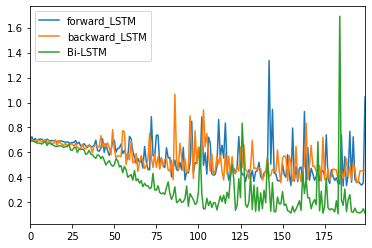

In [25]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from random import random
from numpy import array
from numpy import cumsum
from matplotlib import pyplot
from pandas import DataFrame

# creating an instance of sequence classification
def sequence_get(no_of_timesteps):
    # creating a random no sequence of 1's and 0's
    p = array([random() for _ in range(n_timesteps)])
    # cutoff value finding for making changes to class value
    limit = n_timesteps/4.0
    # finding each items outcome in aumulative form
    q = array([0 if x < limit else 1 for x in cumsum(X)])
    # reshaping according to LSTM
    p = p.reshape(1, no_of_timesteps, 1)
    q = q.reshape(1, no_of_timesteps, 1)
    return p, q

def forward_lstm(no_of_timesteps, backwards):
    lstm = Sequential()
    lstm.add(LSTM(20, input_shape=(n_timesteps, 1), return_sequences=True, go_backwards=backwards))
    lstm.add(TimeDistributed(Dense(1, activation='sigmoid')))
    lstm.compile(loss='binary_crossentropy', optimizer='adam')
    return lstm

def bidirectional_lstm(no_of_timesteps, mode_type):
    lstm = Sequential()
    lstm.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1), merge_mode=mode_type))
    lstm.add(TimeDistributed(Dense(1, activation='sigmoid')))
    lstm.compile(loss='binary_crossentropy', optimizer='adam')
    return lstm

def train_lstm(lstm, no_of_timesteps):
    loss = list()
    for c in range(200):
        # random squence_new
        p,q = get_sequence(no_of_timesteps)
        # model fit
        histogram = lstm.fit(p, q, epochs=1, batch_size=1, verbose=0)
        loss.append(histogram.history['loss'][0])
    return loss


no_of_timesteps = 10
dataframe = DataFrame()
# forward_lstm
lstm = forward_lstm(no_of_timesteps, False)
dataframe['forward_LSTM'] = train_lstm(lstm, no_of_timesteps)
# backward_lstm
lstm = forward_lstm(no_of_timesteps, True)
dataframe['backward_LSTM'] = train_lstm(lstm, no_of_timesteps)
# bidirectional concat
lstm = bidirectional_lstm(no_of_timesteps, 'concat')
dataframe['Bi-LSTM'] = train_lstm(lstm, no_of_timesteps)
# line plot of dataframe
dataframe.plot()
pyplot.show()

In [19]:
%matplotlib inline

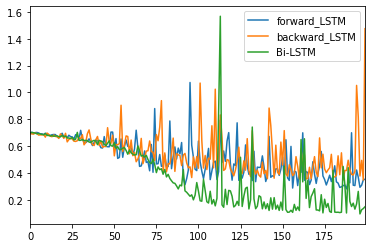

In [20]:
results.plot()

In [4]:
pyplot.show()